# Is this real estate investment financially viable?

### Methodology
1. Calculate Net Present Value (NPV)
2. Calculate Internal Rate of Return (IRR)
3. Plot cumulative NPV over time
4. Calculate payback period

### Import Libraries and Data

In [11]:
import numpy_financial as npf
import numpy as np
import matplotlib.pyplot as plt

# Example cash flows: initial investment (negative) followed by annual returns (positive)
initial_investment = -389900
gross_rental_income = 3702
vacancy_rate = 0.02

vacancy_expense = gross_rental_income * vacancy_rate

monthly_effective_rental_income = gross_rental_income - vacancy_expense
annual_effective_rental_income = monthly_effective_rental_income * 12
annual_rental_income = annual_effective_rental_income
cash_flows = [initial_investment] + [annual_rental_income] * 15  # Example for 15 years
discount_rate = 0.06  # Example discount rate of 8%

### Calculate Internal Rate of Return (IRR) and Net Present Value (NPV)

In [12]:
# Calculate NPV
npv = npf.npv(discount_rate, cash_flows)
print(f"NPV: ${npv:.2f}")
# Calculate IRR
irr = npf.irr(cash_flows)
print(f"IRR: {irr:.2%}")

NPV: $32927.81
IRR: 7.27%


## Plot Cumulative NPV over time

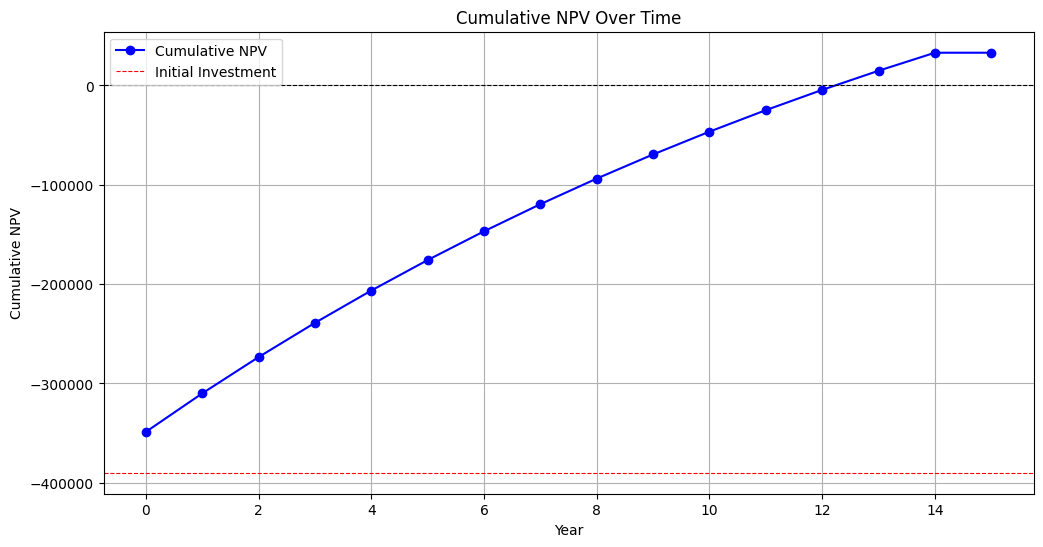

In [13]:
years = np.arange(0, 16)

# Calculate cumulative NPV for each year
cumulative_npv = [npf.npv(discount_rate, cash_flows[:i+1]) for i in range(1, len(cash_flows) + 1)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, cumulative_npv, marker='o', color='b', label='Cumulative NPV')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(initial_investment, color='red', linestyle='--', linewidth=0.8, label='Initial Investment')

plt.title('Cumulative NPV Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative NPV')
plt.legend()
plt.grid(True)
plt.show()

### Calculate Payback Period

In [14]:
def calculate_payback_period(initial_capital, cash_flows):
    cumulative_cash_flow = 0
    for year, cash_flow in enumerate(cash_flows):
        cumulative_cash_flow += cash_flow
        if cumulative_cash_flow >= initial_capital:
            return year + (initial_capital - (cumulative_cash_flow - cash_flow)) / cash_flow
    return None  # Return None if the payback period is not within the provided cash flows

# Example cash flows: initial investment (negative) followed by annual returns (positive)
initial_capital = 389900
cash_flows = [annual_effective_rental_income] * 10  # Example annual cash flow for 10 years

payback_period = calculate_payback_period(initial_capital, cash_flows)
if payback_period:
    print(f"Payback Period: {payback_period:.2f} years")
else:
    print("Payback period not reached within the given cash flows.")

Payback Period: 8.96 years
